# All required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install folium
from folium.plugins import MarkerCluster
#!pip install Counter
from collections import Counter


# Import data

In [2]:
import pandas as pd

# File location
data=pd.read_csv("Dataset .csv")

#display 5 rows
print(data.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

## Level-1 (Task-1 : Top Cuisines)

In [3]:
#1- Count cuisines {some rows have multiple cuisines separated by commas}-We'll split them and count properly.
# Split cuisines by comma, remove extra spaces, and count frequency

cuisine_counts = (
    data['Cuisines']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
)
#2- Get top 5 cuisines
top3_cuisines = cuisine_counts.head(5)
top3_cuisines

#3- Calculate percentage of restaurants serving each top cuisine
total_restaurants = data.shape[0]
percentages = (top3_cuisines / total_restaurants * 100).round(2)

top3_result = pd.DataFrame({
    "Cuisine": top3_cuisines.index,
    "Count": top3_cuisines.values,
    "Percentage (%)": percentages.values
})
top3_result
top3_result.head(5)

,Cuisine,Count,Percentage (%)
0,North Indian,3960,41.46
1,Chinese,2735,28.64
2,Fast Food,1986,20.79
3,Mughlai,995,10.42
4,Italian,764,8.00


## Level-1 (Task-2 : City Analysis)

In [4]:
#1: City with highest number of restaurants
city_rest_counts = data['City'].value_counts()
top_city_restaurants = city_rest_counts.idxmax()
top_city_count = city_rest_counts.max()

#2: Average rating for restaurants in each city
avg_ratings = data.groupby('City')['Aggregate rating'].mean().round(2)

#3: City with highest average rating
top_city_rating = avg_ratings.idxmax()
highest_avg_rating = avg_ratings.max()

#Print results
print("City with the highest number of restaurants:-")
print(f"{top_city_restaurants} ({top_city_count} restaurants)\n")
print("Average rating for each city:-")
print(avg_ratings, "\n")
print("City with the highest average rating:-")
print(f"{top_city_rating} (Average Rating: {highest_avg_rating})")


City with the highest number of restaurants:-
New Delhi (5473 restaurants)

Average rating for each city:-
City
Abu Dhabi          4.30
Agra               3.96
Ahmedabad          4.16
Albany             3.56
Allahabad          3.40
                   ... 
Weirton            3.90
Wellington City    4.25
Winchester Bay     3.20
Yorkton            3.30
��stanbul          4.29
Name: Aggregate rating, Length: 141, dtype: float64 

City with the highest average rating:-
Inner City (Average Rating: 4.9)


## Level-1 (Task-3 : Price range distribution)

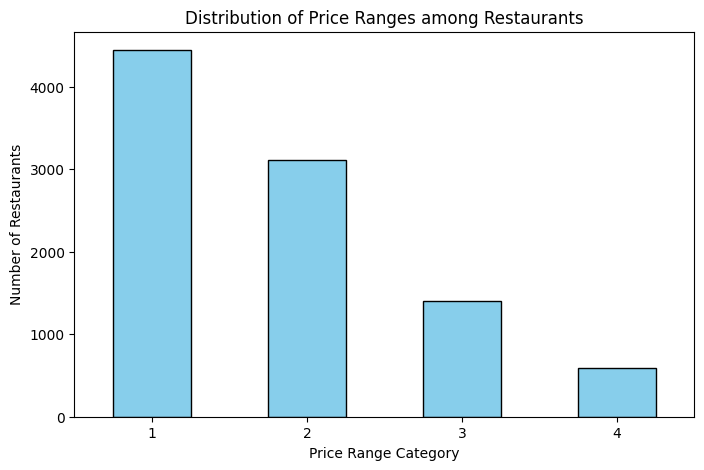

Percentage of Restaurants in Each Price Range:-
Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64


In [5]:
#1: Count restaurants in each price range-
price_counts = data['Price range'].value_counts().sort_index()

#2: Calculate percentage of restaurants in each price range
total_restaurants = data.shape[0]
price_percentages = (price_counts / total_restaurants * 100).round(2)

#3: Create a bar chart-
plt.figure(figsize=(8,5))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Distribution of Price Ranges among Restaurants")
plt.xlabel("Price Range Category")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=0)
plt.show()

#4: Print percentage distribution-
print("Percentage of Restaurants in Each Price Range:-")
print(price_percentages)


## Level-1(Task-4 : Online Delivary)

In [6]:
#1: Percentage of restaurants offering online delivery
online_delivery_counts = data['Has Online delivery'].value_counts()
total_restaurants = data.shape[0]
online_delivery_percentage = (online_delivery_counts / total_restaurants * 100).round(2)

#2: Compare average ratings of restaurants with & without online delivery
avg_rating_comparison = data.groupby('Has Online delivery')['Aggregate rating'].mean().round(2)

# Print results
print("Percentage of Restaurants Offering Online Delivery:")
print(online_delivery_percentage, "\n")
print("Average Ratings (With vs Without Online Delivery):")
print(avg_rating_comparison)


Percentage of Restaurants Offering Online Delivery:
Has Online delivery
No     74.34
Yes    25.66
Name: count, dtype: float64 

Average Ratings (With vs Without Online Delivery):
Has Online delivery
No     2.47
Yes    3.25
Name: Aggregate rating, dtype: float64


## Level-2(Task-1 : Restaurant Ratings)

In [ ]:
# Distribution of aggregate ratings
plt.figure(figsize=(8,5))
plt.hist(data['Aggregate rating'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.show()

# Determine the most common rating value
most_common_rating = data['Aggregate rating'].mode()[0]

# Average number of votes
avg_votes = data['Votes'].mean().round(2)

# Print results
print("Most Common Aggregate Rating:", most_common_rating)
print("Average Number of Votes Received by Restaurants:", avg_votes)


# Level-2(Task-2 : Cuisine Combination)

In [ ]:
#1: Identify most common cuisine combinations
# Normalize by stripping spaces
data['Cuisines'] = data['Cuisines'].dropna().str.strip()

# Count most common combinations (exact matches)
cuisine_combinations = data['Cuisines'].value_counts().head(10)

print("Top 10 Most Common Cuisine Combinations:")
print(cuisine_combinations, "\n")

#2: Average rating for each cuisine combination
cuisine_rating = (
    data.groupby('Cuisines')['Aggregate rating']
    .mean()
    .round(2)
    .sort_values(ascending=False)
)
print("Average Rating per Cuisine Combination (Top 10):")
print(cuisine_rating.head(10))


# Level-2(Task-3 : Geographic Analysis)

In [ ]:
# Plot locations of restaurants
plt.figure(figsize=(10,6))
plt.scatter(data['Longitude'], data['Latitude'], alpha=0.9, c='orange', s=5)
plt.title("Restaurant Locations (Longitude vs Latitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# Level-2(Task-4 : Restaurant Chains)

In [ ]:
#1: Identify restaurant chains (names appearing more than once)
restaurant_counts = data['Restaurant Name'].value_counts()
chains = restaurant_counts[restaurant_counts > 1]

print("Restaurant Chains Found (Top 10):")
print(chains.head(5), "\n")

#2: Analyze average ratings and popularity (votes) of chains
chain_analysis = (
    data[data['Restaurant Name'].isin(chains.index)]
    .groupby('Restaurant Name')
    .agg(
        Restaurant_Count=('Restaurant ID', 'count'),
        Avg_Rating=('Aggregate rating', 'mean'),
        Avg_Votes=('Votes', 'mean')
    )
    .round(2)
    .sort_values(by='Restaurant_Count', ascending=False)
)

print("Analysis of Restaurant Chains (Top 10):")
print(chain_analysis.head(5))


# Level-3(Task-1 : Restaurant Reviews)

In [ ]:
#1: Check for review text column 
# Adjust column names if needed
if 'Review Text' in data.columns:
    reviews = data[['Review Text', 'Aggregate rating']].dropna()
elif 'reviews_list' in data.columns:   # in case column name is different
    reviews = data[['reviews_list', 'aggregate_rating']].dropna()
    reviews.rename(columns={'reviews_list': 'Review Text', 'aggregate_rating': 'Aggregate rating'}, inplace=True)
else:
    print("No text review column found in dataset.")
    reviews = pd.DataFrame(columns=['Review Text', 'Aggregate rating'])

#2: Clean and tokenize reviews 
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters and spaces
    return text.split()

# Apply cleaning
reviews['Tokens'] = reviews['Review Text'].apply(clean_text)

# 3: Count positive & negative keywords 
positive_words = ["good", "great", "excellent", "amazing", "tasty", "delicious", 
                  "friendly", "fast", "nice", "love"]
negative_words = ["bad", "poor", "terrible", "slow", "worst", "awful", 
                  "disappointing", "dirty", "unfriendly", "hate"]

all_tokens = [word for tokens in reviews['Tokens'] for word in tokens]

positive_counts = Counter([w for w in all_tokens if w in positive_words])
negative_counts = Counter([w for w in all_tokens if w in negative_words])

print("Most Common Positive Keywords:", positive_counts.most_common(5))
print("Most Common Negative Keywords:", negative_counts.most_common(5))

# 4: Average review length 
reviews['Review_Length'] = reviews['Tokens'].apply(len)
avg_length = round(reviews['Review_Length'].mean(), 2)
print("\nAverage Review Length:", avg_length)

# 5: Relationship between review length and rating 
plt.figure(figsize=(8,5))
plt.scatter(reviews['Review_Length'], reviews['Aggregate rating'], alpha=0.5, color="purple")
plt.title("Review Length vs Rating")
plt.xlabel("Review Length (words)")
plt.ylabel("Aggregate Rating")
plt.show()


In [ ]:
# Assuming there is a column named "Review Text" or similar
# (adjust column name if needed, e.g., 'Review', 'Reviews', etc.)
if 'Review Text' in data.columns:
    reviews = data[['Review Text', 'Aggregate rating']].dropna()
else:
    print("No text review column found in dataset.")
    reviews = pd.DataFrame(columns=['Review Text','Aggregate rating'])

#1: Clean and tokenize reviews 
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters and spaces
    return text.split()

# Apply cleaning
reviews['Tokens'] = reviews['Review Text'].apply(clean_text)

#2: Count positive & negative keywords ---
positive_words = ["good", "great", "excellent", "amazing", "tasty", "delicious", "friendly", "fast", "nice", "love"]
negative_words = ["bad", "poor", "terrible", "slow", "worst", "awful", "disappointing", "dirty", "unfriendly", "hate"]

all_tokens = [word for tokens in reviews['Tokens'] for word in tokens]

positive_counts = Counter([w for w in all_tokens if w in positive_words])
negative_counts = Counter([w for w in all_tokens if w in negative_words])

print(" Most Common Positive Keywords:", positive_counts.most_common(5))
print("Most Common Negative Keywords:", negative_counts.most_common(5))

#3: Average review length ---
reviews['Review_Length'] = reviews['Tokens'].apply(len)
avg_length = reviews['Review_Length'].mean().round(2)
print("\nAverage Review Length:", avg_length)

#4: Relationship between review length and rating ---
plt.figure(figsize=(8,5))
plt.scatter(reviews['Review_Length'], reviews['Aggregate rating'], alpha=0.5, color="purple")
plt.title("Review Length vs Rating")
plt.xlabel("Review Length (words)")
plt.ylabel("Aggregate Rating")
plt.show()


# Level-3(Task-2 : Votes Analysis)

In [ ]:
# Convert Votes to numeric just in case it's stored as string
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
# Find restaurant with highest and lowest votes
highest_votes = data.loc[data['Votes'].idxmax(), ['Restaurant Name', 'Votes', 'Aggregate rating']]
lowest_votes = data.loc[data['Votes'].idxmin(), ['Restaurant Name', 'Votes', 'Aggregate rating']]
highest_votes, lowest_votes

In [ ]:
# Correlation analysis between Votes and Aggregate rating
correlation = data[['Votes', 'Aggregate rating']].corr().iloc[0,1]
correlation
#correlation coefficient between Votes and Aggregate Rating is 0.3136

# Level-3(Task-3 : Price range VS online delivary and table booking)

In [ ]:
 # Clean up categorical columns for consistency (Yes/No)
data['Has Table booking'] = data['Has Table booking'].str.strip().str.capitalize()
data['Has Online delivery'] = data['Has Online delivery'].str.strip().str.capitalize()

# Cross-tabulation of Price range vs Table booking and Online delivery
table_booking_ct = pd.crosstab(data['Price range'], data['Has Table booking'], normalize='index')
online_delivery_ct = pd.crosstab(data['Price range'], data['Has Online delivery'], normalize='index')

# Plot relationship for better visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

table_booking_ct.plot(kind='bar', stacked=True, ax=axes[0], colormap="viridis")
axes[0].set_title("Price Range vs Table Booking Availability")
axes[0].set_ylabel("Proportion")

online_delivery_ct.plot(kind='bar', stacked=True, ax=axes[1], colormap="plasma")
axes[1].set_title("Price Range vs Online Delivery Availability")
axes[1].set_ylabel("Proportion")

plt.tight_layout()
plt.show()

table_booking_ct, online_delivery_ct
